In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import shutil
import sys
import time
import pprint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

# print(tf.__version__)
# print(sys.version_info)
# for module in mpl, np, pd, sklearn, tf, keras:
#     print(module.__name__, module.__version__) 

In [2]:
#数据
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)


# x = (x-u)/std（归一化）
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32))
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32))
x_test_scaled = scaler.transform(
    x_test.astype(np.float32))

In [7]:
def customize_mse(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_pred-y_true))

model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',
                      input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss=customize_mse ,optimizer="sgd",metrics=['mean_squared_error'])
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

history = model.fit(x_train_scaled,y_train,
                    validation_data=(x_valid_scaled,y_valid),
                   epochs=100,
                   callbacks = callbacks)

ValueError: Unknown metric function:error

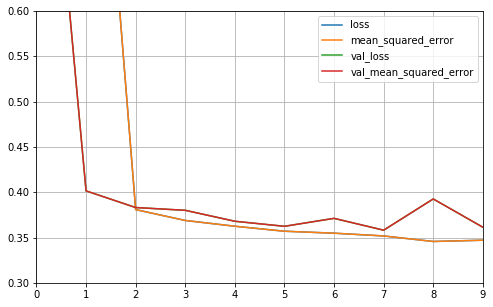

In [5]:
 def plot_learning_curves(his):
        pd.DataFrame(his.history).plot(figsize=(8,5))
        plt.grid(True)
        plt.gca().set_ylim(0.3,0.6)
        plt.show()
        
plot_learning_curves(history)

In [6]:
model.evaluate(x_test_scaled,y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.3707 - mean_squared_error: 0.3707


[0.3706501555997272, 0.37065005]